
# 📘 Chapter 12: Principal Component Analysis (PCA)

This chapter introduces **Principal Component Analysis (PCA)**, a foundational technique for dimensionality reduction.  
The exposition is in third‑person, textbook style, with LaTeX equations and runnable examples.



## 12.1 Motivation

High‑dimensional data often contains correlated features and redundant information. PCA transforms the data into a new coordinate system where the axes (called **principal components**) correspond to directions of **maximum variance**.

Benefits:
- Reduced dimensionality for visualization.  
- Noise reduction.  
- Preprocessing for machine learning models.



## 12.2 Mathematical Formulation

Given a centered dataset $( X \in \mathbb{R}^{n \times d} $) (rows = samples, columns = features):

1. Compute the **empirical covariance matrix**:
$$
\Sigma \;=\; \frac{1}{n}\, X^\top X \, .
$$

2. Perform **eigen decomposition**:
$$
\Sigma v_j \;=\; \lambda_j v_j \, ,
$$
where $( v_j $) are eigenvectors and $( \lambda_j $) the corresponding eigenvalues.

3. Order eigenvalues: $( \lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_d $).  
   The top $(k$)) eigenvectors form the projection matrix $( W_k = [v_1,\dots,v_k] $).

4. Project the data:
$$
Z = X W_k \quad \in \mathbb{R}^{n \times k} \, .
$$

Thus, PCA finds an orthogonal basis maximizing variance along successive axes.



## 12.3 Geometric Interpretation

- Each principal component is a new axis through the data cloud that maximizes variance.  
- Successive components are orthogonal to prior ones.  
- In 2‑D, PCA finds the best line (1‑D subspace) to project data with minimal reconstruction error.



## 12.4 Hands‑On A: PCA on Iris Dataset

The Iris dataset has 4 features. PCA reduces it to 2 dimensions for visualization.


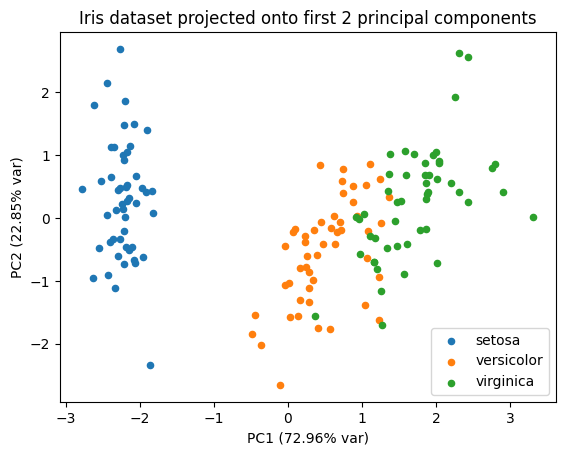

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Iris data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize features
X_std = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Scatter plot
plt.figure()
for t in np.unique(y):
    plt.scatter(X_pca[y == t, 0], X_pca[y == t, 1], label=target_names[t], s=20)
plt.xlabel("PC1 (%.2f%% var)" % (pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 (%.2f%% var)" % (pca.explained_variance_ratio_[1]*100))
plt.title("Iris dataset projected onto first 2 principal components")
plt.legend()
plt.show()



## 12.5 Explained Variance and Scree Plot

The eigenvalues indicate how much variance each component explains.


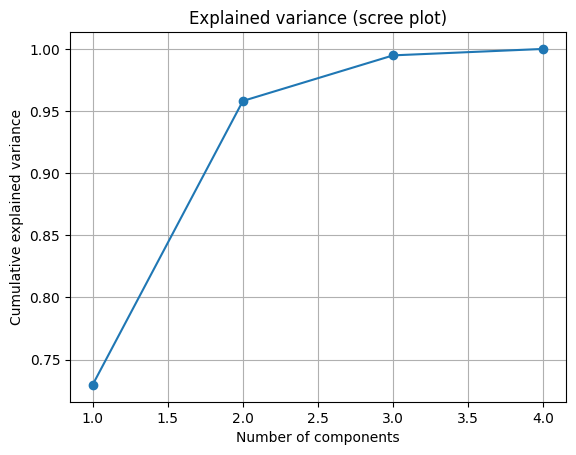

In [2]:

# Fit PCA with all components
pca_full = PCA().fit(X_std)

plt.figure()
plt.plot(np.arange(1, len(pca_full.explained_variance_ratio_)+1),
         np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance (scree plot)")
plt.grid(True)
plt.show()



## 12.6 Applications of PCA

- **Visualization**: reduce high‑dimensional data to 2D or 3D for plotting.  
- **Noise reduction**: discard components with very small variance (often dominated by noise).  
- **Preprocessing**: PCA as an input step before clustering or classification.  
- **Compression**: store fewer dimensions while retaining most information.



## 12.7 Limitations

- PCA is linear; nonlinear manifolds may require kernel PCA, t‑SNE, or UMAP.  
- Sensitive to scaling; features must be standardized.  
- Directions of maximum variance are not always the most discriminative for classification.



## 12.8 Summary

- PCA finds orthogonal directions (principal components) of maximal variance.  
- Computed via eigen decomposition of covariance or SVD.  
- The explained variance guides how many components to keep.  
- Useful for visualization, compression, and preprocessing, but limited for nonlinear data.
